***
# <font color="grey">Problem Sheet 6 Part B - Solutions</font>
***
$\newcommand{\vct}[1]{\mathbf{#1}}$
$\newcommand{\mtx}[1]{\mathbf{#1}}$
$\newcommand{\e}{\varepsilon}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\minimize}{\text{minimize}\quad}$
$\newcommand{\maximize}{\text{maximize}\quad}$
$\newcommand{\subjto}{\quad\text{subject to}\quad}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\trans}{T}$
$\newcommand{\ip}[2]{\langle {#1}, {#2} \rangle}$
$\newcommand{\zerovct}{\vct{0}}$
$\newcommand{\diff}[1]{\mathrm{d}{#1}}$

### Solution to Problem 6.4

(a) We first write down the matrix $\mtx{A}$:
 
 \begin{equation*}
 \mtx{A} = \begin{pmatrix}
            0 & 0.2 & 0.4 & 0.6 & 0.8 & 1 & 1.2 & 1.4&1.6&1.8&2 \\
            1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1
           \end{pmatrix}
\end{equation*}

and the vectors $\vct{b}$ and $\vct{c}$:

\begin{equation*}
 \vct{b} = \begin{pmatrix}
            1\\1
           \end{pmatrix}, \
\vct{c} = \begin{pmatrix}
           1 & 1.01 & 1.04 & 1.09 & 1.16 & 1.25 & 1.36 & 1.49 & 1.64 & 1.81 & 2
          \end{pmatrix}^{\trans}
\end{equation*}

The primal version of the problem is given by

 \begin{align*}
 \minimize  &  x_1+1.01x_2+1.04x_3+1.09x_4+1.16x_5+1.25x_6+1.36x_7\\
 &+1.49x_8+1.64x_9+1.81x_{10}+2x_{11}\\
 \subjto  &0.2x_2+0.4x_3+0.6x_4+0.8x_5+x_6+1.2x_7+1.4x_8+1.6x_9\\
          &+1.8x_{10}+2x_{11}=1\\
          &x_1+x_2+x_3+x_4+x_5+x_6+x_7+x_8+x_9+x_{10}+x_{11}=1\\
          & x_i\geq 0.
 \end{align*}

We define the matrix $\mtx{A}$ and the vectors $\vct{b}$ and $\vct{c}$ for this problem in Python as follows.

In [1]:
import numpy as np
import numpy.linalg as la

In [2]:
v = np.linspace(0,1,11)
n = len(v)
A = np.concatenate((2*v.reshape((1,n)), np.ones((1,n))), axis=0)
c = 1+v**2
b = np.array([1,1])

(b) The problem has $m=2$ dual variables $y_1$ and $y_2$, so the projection of the trajectory on the $\vct{y}$-plane can easily be visualised. The Python code implementinng the long-step primal-dual method with parameters $\sigma=0.1, 0.5, 0.9$ is given below.

In [3]:
# Define the function F and the Jacobian matrix M
def F(x, y, s):
    C1 = np.dot(A.T,y)+s-c
    C2 = np.dot(A,x)-b
    C3 = x*s
    return np.concatenate((C1, C2, C3))

def M(x, y, s):
    return np.asarray(np.bmat([[np.zeros((n,n)), A.T, np.eye(n)],
                    [A, np.zeros((2,2)), np.zeros((2,n))],
                    [np.diag(s), np.zeros((n,2)), np.diag(x)]]))

In [4]:
x = np.ones(n)/11.
y = np.array([0,0])
s = c-np.dot(A.T, y)

In [5]:
def longstep(x, y, s, sigma, gamma=1e-3, tol=1e-4): 
    mu = 1
    i = 1
    yy = np.zeros((2,50))
    while mu>tol and i<50:
        a = 1
        mu = np.dot(x,s)/11.
        rhs = F(x,y,s)-np.concatenate((np.zeros(n+2), sigma*mu*np.ones(11)))
        delta = -la.solve(M(x,y,s), rhs)
        xs = np.concatenate((x,s))
        deltaxs = np.concatenate((delta[:11], delta[13:]))
    
        I = np.argmin(xs+deltaxs)
        m = xs[I]+deltaxs[I]
        if m<gamma*mu:
            a = np.amin(-xs[I]/deltaxs[I])
    
        x = x+a*delta[:11]
        y = y+a*delta[11:13]
        s = s+a*delta[13:]
    
        yy[:,i] = y
        i+=1
    return yy[:,:i]

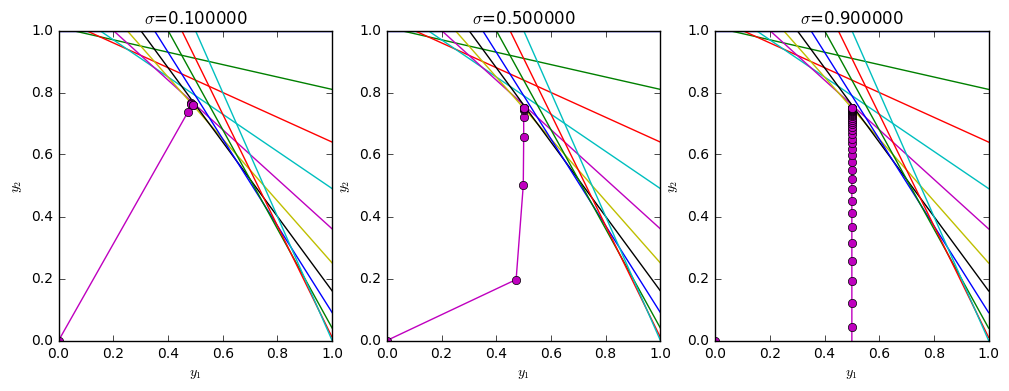

In [6]:
import matplotlib.pyplot as plt
% matplotlib inline
fig, ax = plt.subplots(1,3, figsize=(12, 4))
xx = np.linspace(0,1,100)
sigmas = [0.1, 0.5, 0.9]

for k in range(3):
    yy = longstep(x,y,s,sigmas[k])
    ax[k].set_ylim([0,1])
    for j in range(n):
        ax[k].plot(xx,c[j]-np.dot(A[0,j],xx))
    ax[k].plot(yy[0,:], yy[1,:], '-o')
    ax[k].set_title("$\sigma$={:f}".format(sigmas[k]))
    ax[k].set_xlabel('$y_1$')
    ax[k].set_ylabel('$y_2$')
plt.show()

(c)  In the figure, the central path is shown as the vertical line in the $\vct{y}$ plane. 

In [7]:
def longstep_xs(x, y, s, sigma, gamma=1e-3, tol=1e-4): 
    mu = 1
    i = 1
    xxs = np.zeros((2,50))
    xxs[:,0] = np.array([x[1]*s[1],x[4]*s[4]])
    while mu>tol and i<50:
        a = 1
        mu = np.dot(x,s)/11.
        rhs = F(x,y,s)-np.concatenate((np.zeros(n+2), sigma*mu*np.ones(11)))
        delta = -la.solve(M(x,y,s), rhs)
        xs = np.concatenate((x,s))
        deltaxs = np.concatenate((delta[:11], delta[13:]))
    
        I = np.argmin(xs+deltaxs)
        m = xs[I]+deltaxs[I]
        if m<gamma*mu:
            a = np.amin(-xs[I]/deltaxs[I])
    
        x = x+a*delta[:11]
        y = y+a*delta[11:13]
        s = s+a*delta[13:]
        xxs[:,i] = np.array([x[1]*s[1],x[4]*s[4]])
        i+=1
    return xxs[:,:i]

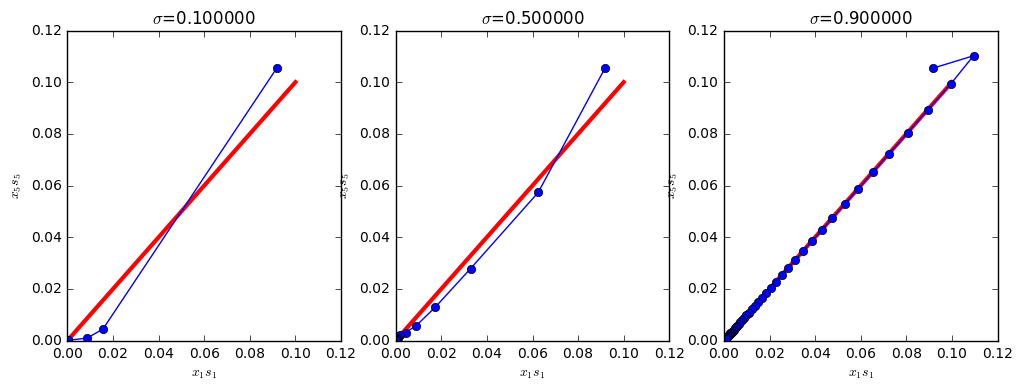

In [8]:
fig, ax = plt.subplots(1,3, figsize=(12, 4))
xx = np.linspace(0,0.1,100)
sigmas = [0.1, 0.5, 0.9]

for k in range(3):
    xs = longstep_xs(x,y,s,sigmas[k])
    ax[k].plot(xx,xx,linewidth=3, color='red')
    ax[k].plot(xs[0,:], xs[1,:], '-o')
    ax[k].set_title("$\sigma$={:f}".format(sigmas[k]))
    ax[k].set_xlabel('$x_1s_1$')
    ax[k].set_ylabel('$x_5s_5$')
plt.show()

### Solution to Problem 6.5

This problem is a special case of Problem 6.3. We nevertheless solve it from scratch.
First compute the gradient of all terms,

\begin{equation*}
 \nabla (\vct{x}^{\trans}\mtx{\Sigma} \vct{x}) = 2\mtx{\Sigma} \vct{x}, \quad \nabla (\vct{x}^{\trans}\vct{e}) = \vct{e}, \quad \nabla (\vct{x}^{\trans}\vct{r})=\vct{r}.
\end{equation*}

Then the Lagrange equation is given by (we absorbed the factor $2$):

\begin{equation*}
 \mtx{\Sigma} \vct{x}-\lambda \vct{e}-\eta \vct{r} = \zerovct \Leftrightarrow \vct{x} = \lambda \mtx{\Sigma}^{-1}\vct{e}+\eta\mtx{\Sigma}^{-1}\vct{r}.
\end{equation*}

Multiplying with $\vct{e}^{\trans}$ and $\vct{r}^{\trans}$ we get $\lambda$ and $\eta$ as the solution of a system of equations

\begin{align*}
 1 = \vct{e}^{\trans}\vct{x} &= \lambda \vct{e}^{\trans}\mtx{\Sigma}^{-1}\vct{e}+ \eta \vct{e}^{\trans}\mtx{\Sigma}^{-1}\vct{r}\\
 \mu = \vct{r}^{\trans}\vct{x} &= \lambda \vct{r}^{\trans}\mtx{\Sigma}^{-1}\vct{e}+ \eta \vct{r}^{\trans}\mtx{\Sigma}^{-1}\vct{r}.
\end{align*}

Setting $a=\vct{e}^{\trans}\mtx{\Sigma}^{-1}\vct{e}$, $b=\vct{e}^{\trans}\mtx{\Sigma}^{-1}\vct{r}$ and $c=\vct{r}^{-1}\mtx{\Sigma}^{-1}\vct{r}$, this corresponds to the system of equations

\begin{equation*}
 \begin{pmatrix} a & b\\ b& c\end{pmatrix} \begin{pmatrix} \lambda \\ \eta\end{pmatrix} = \begin{pmatrix} 1\\ \mu\end{pmatrix}.
\end{equation*}

Using Cramer's rule for the solution of a $2\times 2$ system of equations (or solving this by Gaussian elimination directly), we get

\begin{equation*}
 \begin{pmatrix} \lambda\\ \eta\end{pmatrix} = \frac{1}{ac-b^2} \begin{pmatrix} a\mu-b\\c-b\mu \end{pmatrix}.
\end{equation*}

Plugging these into the first equation, the closed-form solution is

\begin{equation*}
 \vct{x} = \frac{1}{ac-b^2} \left(c\mtx{\Sigma}^{-1}\vct{r}-b\mtx{\Sigma}^{-1}\vct{e}\right)+\mu\cdot \left(a\mtx{\Sigma}^{-1}\vct{e}-b\mtx{\Sigma}^{-1}\vct{r}\right).
\end{equation*}

Note that this is an affine function in $\mu$, the target return. The variance itself is then

\begin{equation*}
 \vct{x}^{\trans}\mtx{\Sigma}\vct{x}.
\end{equation*}

Plotting the variance against the target return gives the following graph

(images/portfolio_cropped.pdf)

As we see, the smallest risk occurs when targeting around 6-8\% return.

In [9]:
S = np.array([[185, 86.5, 80, 20],
    [86.5, 196, 76, 13.5],
    [80, 76, 411, -19],
    [20, 13.5, -19, 25]])
r = np.array([14,12,15,7])
e = np.ones(4)

In [10]:
Se = la.solve(S, e)
Sr = la.solve(S, r)
a = np.dot(e, Se)
b = np.dot(e, Sr)
c = np.dot(r, Sr)
d = (c*Sr-b*Se)/(a*c-b**2)
s = (a*Se-b*Sr)/(a*c-b**2)

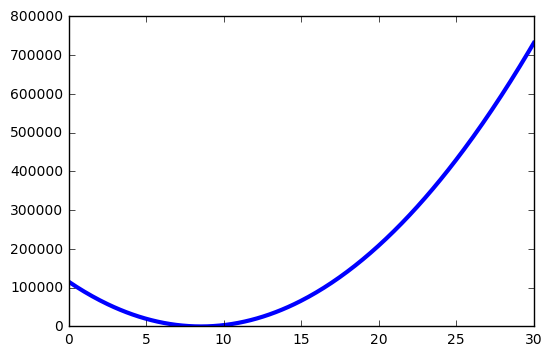

In [11]:
mu = np.linspace(0,30,300)
xx = np.outer(d.reshape((len(d),1)),np.ones((len(mu),1)))+np.outer(s.reshape((len(s),1)),mu.reshape((len(mu),1)))
temp = np.dot(S,xx)
risk = np.zeros(xx.shape[1])
for i in range(xx.shape[1]):
    risk[i] = np.dot(xx[:,i],temp[:,i])
plt.plot(mu, risk, linewidth=3)
plt.show()